In [42]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
con=sqlite3.connect('database.sqlite')

In [44]:
df=pd.read_sql_query("SELECT * FROM Player_Attributes",con)

In [45]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [46]:
df.shape

(183978, 42)

In [47]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [48]:
df.isnull().values.any()

True

In [49]:
#drpcol=['date','id', 'player_fifa_api_id', 'player_api_id']
drpcol=['date','id','player_api_id']

In [50]:
df2= df.drop_duplicates('player_fifa_api_id')
df2.head()
df2=df.dropna()
df2.drop(drpcol,axis=1,inplace=True)

C:\Users\abhinav\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [51]:
df2.shape

(180354, 39)

In [52]:
df2.head()

,player_fifa_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,218353,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,218353,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,218353,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [53]:
cat_data=df2.dtypes[df2.dtypes=='object'].index
cat_data

Index(['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [54]:
lc=[3,4,5]

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in lc:
    df2.iloc[:, i] = labelencoder.fit_transform(df2.iloc[:, i])

C:\Users\abhinav\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [56]:
df2.head()

,player_fifa_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,218353,67.0,71.0,1,4,14,49.0,44.0,71.0,61.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,218353,67.0,71.0,1,4,14,49.0,44.0,71.0,61.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,62.0,66.0,1,4,14,49.0,44.0,71.0,61.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,61.0,65.0,1,4,14,48.0,43.0,70.0,60.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,218353,61.0,65.0,1,4,14,48.0,43.0,70.0,60.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [57]:
df2.columns

Index(['player_fifa_api_id', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

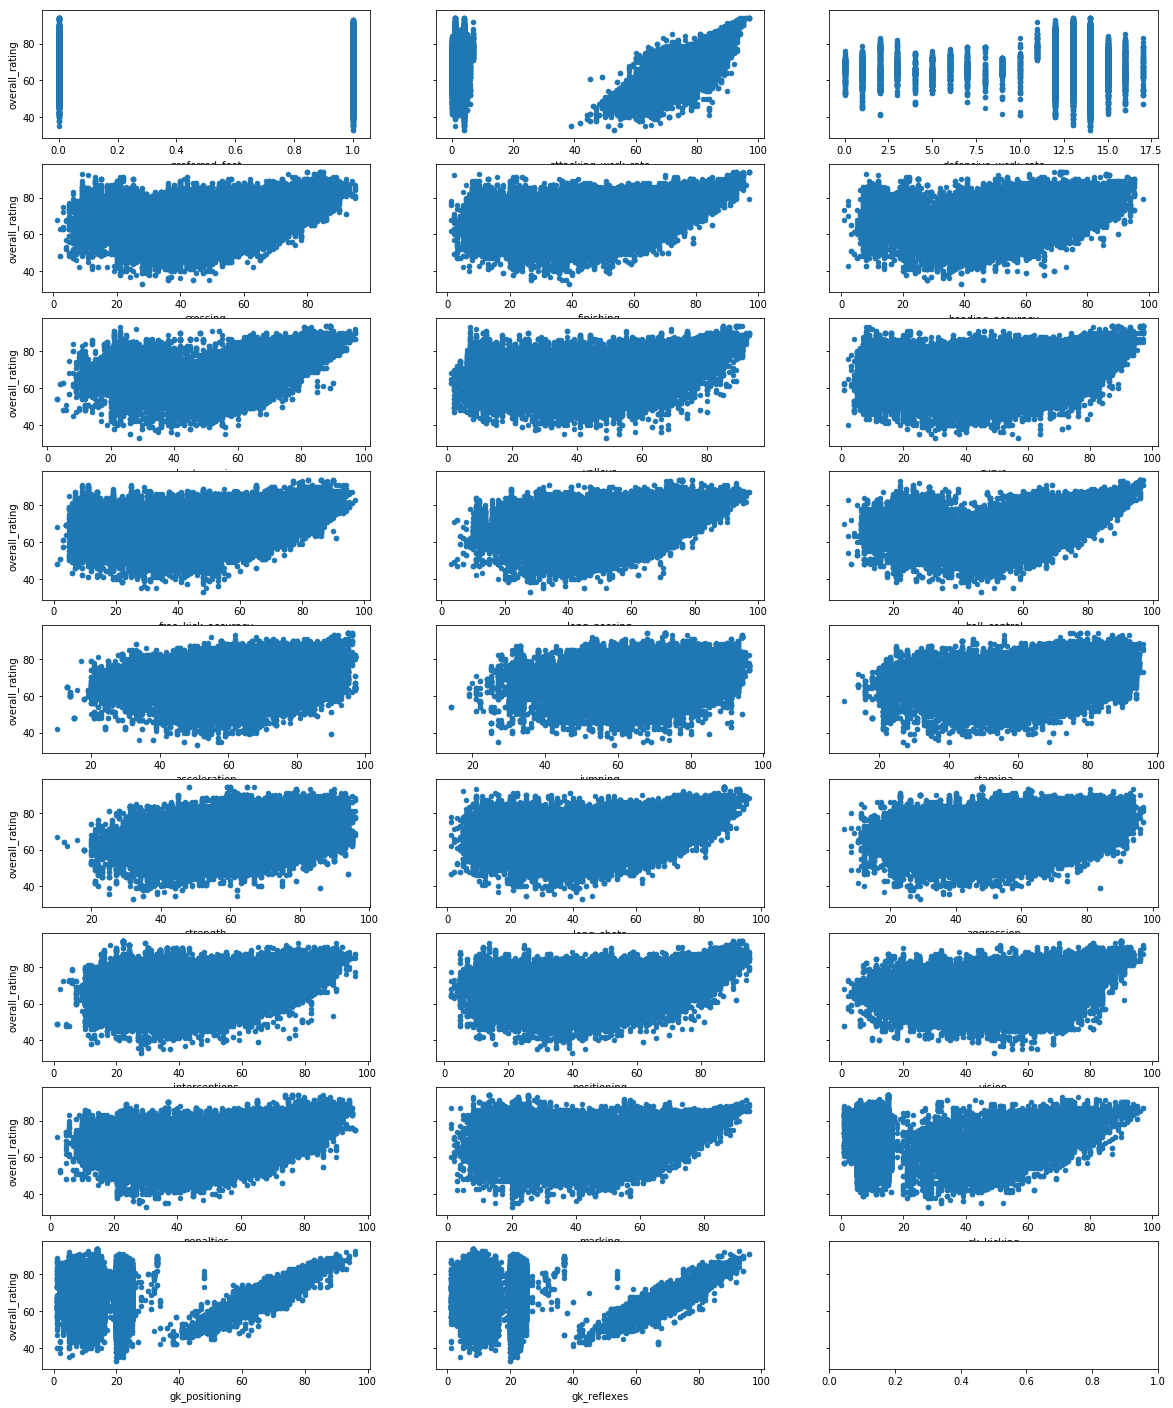

In [58]:
fig,axs=plt.subplots(9,3,sharey=True)
df2.plot(x='preferred_foot',y='overall_rating',kind='scatter',ax=axs[0,0],figsize=(20,25))
df2.plot(x='potential',y='overall_rating',kind='scatter',ax=axs[0,1])
df2.plot(x='attacking_work_rate',y='overall_rating',kind='scatter',ax=axs[0,1])
df2.plot(x='defensive_work_rate',y='overall_rating',kind='scatter',ax=axs[0,2])
df2.plot(x='crossing',y='overall_rating',kind='scatter',ax=axs[1,0])
df2.plot(x='finishing',y='overall_rating',kind='scatter',ax=axs[1,1])
df2.plot(x='heading_accuracy',y='overall_rating',kind='scatter',ax=axs[1,2])
df2.plot(x='short_passing',y='overall_rating',kind='scatter',ax=axs[2,0])
df2.plot(x='volleys',y='overall_rating',kind='scatter',ax=axs[2,1])
df2.plot(x='dribbling',y='overall_rating',kind='scatter',ax=axs[2,2])
df2.plot(x='curve',y='overall_rating',kind='scatter',ax=axs[2,2])
df2.plot(x='free_kick_accuracy',y='overall_rating',kind='scatter',ax=axs[3,0])
df2.plot(x='long_passing',y='overall_rating',kind='scatter',ax=axs[3,1])
df2.plot(x='ball_control',y='overall_rating',kind='scatter',ax=axs[3,2])
df2.plot(x='acceleration',y='overall_rating',kind='scatter',ax=axs[4,0])
df2.plot(x='jumping',y='overall_rating',kind='scatter',ax=axs[4,1])
df2.plot(x='stamina',y='overall_rating',kind='scatter',ax=axs[4,2])
df2.plot(x='strength',y='overall_rating',kind='scatter',ax=axs[5,0])
df2.plot(x='long_shots',y='overall_rating',kind='scatter',ax=axs[5,1])
df2.plot(x='aggression',y='overall_rating',kind='scatter',ax=axs[5,2])
df2.plot(x='interceptions',y='overall_rating',kind='scatter',ax=axs[6,0])
df2.plot(x='positioning',y='overall_rating',kind='scatter',ax=axs[6,1])
df2.plot(x='vision',y='overall_rating',kind='scatter',ax=axs[6,2])
df2.plot(x='penalties',y='overall_rating',kind='scatter',ax=axs[7,0])
df2.plot(x='marking',y='overall_rating',kind='scatter',ax=axs[7,1])
df2.plot(x='gk_kicking',y='overall_rating',kind='scatter',ax=axs[7,2])
df2.plot(x='gk_positioning',y='overall_rating',kind='scatter',ax=axs[8,0])
df2.plot(x='gk_reflexes',y='overall_rating',kind='scatter',ax=axs[8,1])

From above graphs we can derive that column preferred_foot is not having much impact on overall ratings.

In [59]:
crr=df2.corr().abs()
crr

,player_fifa_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_fifa_api_id,1.000000,0.278703,0.021252,0.008626,0.043737,0.007222,0.065631,0.029836,0.103500,0.065311,...,0.163099,0.175255,0.075568,0.071128,0.055218,0.092945,0.138844,0.248222,0.140925,0.131531
overall_rating,0.278703,1.000000,0.765435,0.001417,0.129166,0.046834,0.357320,0.330079,0.313324,0.458243,...,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
potential,0.021252,0.765435,1.000000,0.003513,0.114670,0.012218,0.277284,0.287838,0.206063,0.382538,...,0.379278,0.315207,0.054094,0.082073,0.063284,0.012283,0.005865,0.092299,0.004472,0.004936
preferred_foot,0.008626,0.001417,0.003513,1.000000,0.032065,0.013930,0.174033,0.012004,0.004765,0.073302,...,0.039395,0.016476,0.095221,0.091167,0.098139,0.074524,0.077679,0.044258,0.075666,0.075233
attacking_work_rate,0.043737,0.129166,0.114670,0.032065,1.000000,0.212135,0.247827,0.236444,0.103900,0.182351,...,0.187983,0.179174,0.008189,0.007133,0.011389,0.165154,0.160999,0.109389,0.162644,0.163737
defensive_work_rate,0.007222,0.046834,0.012218,0.013930,0.212135,1.000000,0.027891,0.018891,0.094160,0.074092,...,0.042325,0.035335,0.085628,0.090396,0.088061,0.079904,0.079708,0.054490,0.078894,0.078783
crossing,0.065631,0.357320,0.277284,0.174033,0.247827,0.027891,1.000000,0.576896,0.368956,0.790323,...,0.693978,0.574208,0.234886,0.285018,0.274673,0.604567,0.595646,0.356728,0.597742,0.601696
finishing,0.029836,0.330079,0.287838,0.012004,0.236444,0.018891,0.576896,1.000000,0.373459,0.580245,...,0.652376,0.726234,0.285416,0.230453,0.262144,0.479370,0.465135,0.292349,0.470758,0.473302
heading_accuracy,0.103500,0.313324,0.206063,0.004765,0.103900,0.094160,0.368956,0.373459,1.000000,0.548435,...,0.336472,0.431291,0.460831,0.480054,0.441134,0.665600,0.649145,0.402865,0.648981,0.652494
short_passing,0.065311,0.458243,0.382538,0.073302,0.182351,0.074092,0.790323,0.580245,0.548435,1.000000,...,0.766401,0.612511,0.349578,0.415427,0.380148,0.694111,0.689874,0.422659,0.691030,0.693260


In [60]:
#import seaborn as sns

From the correlation we can find that 'preferred_foot','gk_reflexes','gk_positioning','gk_handling',o e ill drop it.

In [61]:
drpcol2=['preferred_foot','gk_reflexes','gk_positioning','gk_handling']

In [62]:
df2.drop(drpcol2,axis=1,inplace=True)

In [63]:
df2.head()

,player_fifa_api_id,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_kicking
0,218353,67.0,71.0,4,14,49.0,44.0,71.0,61.0,44.0,...,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,10.0
1,218353,67.0,71.0,4,14,49.0,44.0,71.0,61.0,44.0,...,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,10.0
2,218353,62.0,66.0,4,14,49.0,44.0,71.0,61.0,44.0,...,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,10.0
3,218353,61.0,65.0,4,14,48.0,43.0,70.0,60.0,43.0,...,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,9.0
4,218353,61.0,65.0,4,14,48.0,43.0,70.0,60.0,43.0,...,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,9.0


Removing the outliers using z score

In [64]:
from scipy import stats
import numpy as np

In [65]:
z=np.abs(stats.zscore(df2))
z

array([[0.97557003, 0.2326883 , 0.37670587, ..., 0.97118884, 0.51638711,
        0.4978426 ],
       [0.97557003, 0.2326883 , 0.37670587, ..., 0.97118884, 0.51638711,
        0.4978426 ],
       [0.97557003, 0.94413529, 1.13635982, ..., 0.97118884, 0.51638711,
        0.4978426 ],
       ...,
       [1.22040029, 1.19020567, 0.99067124, ..., 0.83497124, 0.33825472,
        2.48174875],
       [1.22040029, 1.33249507, 1.14260203, ..., 0.83497124, 0.33825472,
        2.48174875],
       [1.22040029, 1.61707386, 1.14260203, ..., 0.83497124, 0.33825472,
        2.71822425]])

In [66]:
df2 = df2[(z <=3).all(axis=1)]
df2.head()

,player_fifa_api_id,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_kicking
0,218353,67.0,71.0,4,14,49.0,44.0,71.0,61.0,44.0,...,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,10.0
1,218353,67.0,71.0,4,14,49.0,44.0,71.0,61.0,44.0,...,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,10.0
2,218353,62.0,66.0,4,14,49.0,44.0,71.0,61.0,44.0,...,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,10.0
3,218353,61.0,65.0,4,14,48.0,43.0,70.0,60.0,43.0,...,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,9.0
4,218353,61.0,65.0,4,14,48.0,43.0,70.0,60.0,43.0,...,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,9.0


In [67]:
df2.shape

(158103, 35)

In [68]:
df2.columns

Index(['player_fifa_api_id', 'overall_rating', 'potential',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_kicking'],
      dtype='object')

In [69]:
featcol=[ 'player_fifa_api_id', 'overall_rating', 'potential',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties','sliding_tackle', 'marking','gk_kicking']

In [70]:
X=df2[featcol]

In [71]:
y=df2['overall_rating']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [73]:
regressor=LinearRegression()

In [74]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
y_pred=np.array(regressor.predict(X_test))

In [76]:
y_target=np.array(y_test)

In [77]:
rmse=np.sqrt(((y_pred-y_target)**2).mean())
rmse

1.588745768883391e-11

Using Decision Tree

In [78]:
from sklearn import tree, metrics, model_selection , preprocessing

In [79]:
dtree1=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)
dtree1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [80]:
y_pred2=dtree1.predict(X_test)

In [81]:
accuracy=metrics.accuracy_score(y_test,y_pred2)

In [82]:
print('The Accuracy of model is= {}'.format(accuracy))

The Accuracy of model is= 0.7094652288036432
